In [1]:

import dlib
import cv2 as cv
from mtcnn.mtcnn import MTCNN
import face_recognition as facer

from tqdm import tqdm
from tqdm import tnrange
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plot


Using TensorFlow backend.


In [2]:
pNum = "T000001"

proj = ".."
pimg = f"{proj}/Data/images"
pmdl = f"{proj}/Model"
pout = f"{proj}/Out/{pNum}"


In [3]:
# st, ed = 1, 100
st, ed = 1, 712


In [4]:
modelv = "_81"
detector = dlib.get_frontal_face_detector()
%time predictor = dlib.shape_predictor(f"{pmdl}/shape_predictor{modelv}_face_landmarks.dat")


def f_xy(images):
    min_y, max_y, min_x, max_x = 112, 0, 112, 0
    cv_face = detector(cv.cvtColor(images, cv.COLOR_BGR2GRAY), 1)
    if cv_face:
        for face in cv_face:
            shape = predictor(images, face)
            for pt in shape.parts():
                min_y, max_y = min(pt.y, min_y), max(pt.y, max_y)
                min_x, max_x = min(pt.x, min_x), max(pt.x, max_x)
    else:
        min_y, max_y, min_x, max_x = 0, 112, 0, 112
    
    min_y, max_y, min_x, max_x = max(min_y,0), min(max_y,112), max(min_x,0), min(max_x,112)
    return min_y, max_y, min_x, max_x

print(
    f_xy(cv.imread(f"{pimg}/00001.jpg")), 
    f_xy(cv.imread(f"{pimg}/00003.jpg"))
)
%time f_xy(cv.imread(f"{pimg}/00001.jpg"))


CPU times: user 122 ms, sys: 12.9 ms, total: 135 ms
Wall time: 138 ms
(16, 112, 19, 102) (0, 112, 0, 112)
CPU times: user 7.75 ms, sys: 421 µs, total: 8.17 ms
Wall time: 7.93 ms


(16, 112, 19, 102)

In [5]:
%time dmtcnn = MTCNN()

def f_xy_mtcnn(images):
    rdetector = dmtcnn.detect_faces(images)
    min_y, max_y, min_x, max_x = 112, 0, 112, 0
    if rdetector:
        x, y, w, h = rdetector[0]["box"]
        min_y, max_y, min_x, max_x = y, y+h, x, x+w
    else:
        min_y, max_y, min_x, max_x = 0, 112, 0, 112
        
    min_y, max_y, min_x, max_x = max(min_y,0), min(max_y,112), max(min_x,0), min(max_x,112)
    return min_y, max_y, min_x, max_x

print(
    f_xy_mtcnn(cv.imread(f"{pimg}/00001.jpg")), 
    f_xy_mtcnn(cv.imread(f"{pimg}/00003.jpg")),
    f_xy_mtcnn(cv.imread(f"{pimg}/00489.jpg"))
)
%time f_xy_mtcnn(cv.imread(f"{pimg}/00001.jpg"))


CPU times: user 181 ms, sys: 17.4 ms, total: 198 ms
Wall time: 204 ms
(17, 112, 14, 99) (14, 111, 2, 80) (0, 112, 0, 112)
CPU times: user 15 ms, sys: 4.95 ms, total: 20 ms
Wall time: 10.2 ms


(17, 112, 14, 99)

In [6]:

def f_xy_facer(images):
    result = facer.face_landmarks(images)
    min_y, max_y, min_x, max_x = 112, 0, 112, 0
    if result:
        resultl = []
        for ir in result[0].values():
            resultl += ir
        for ir in resultl:
            min_y, max_y = min(ir[1], min_y), max(ir[1], max_y)
            min_x, max_x = min(ir[0], min_x), max(ir[0], max_x)
    else:
        min_y, max_y, min_x, max_x = 0, 112, 0, 112
    
    min_y, max_y, min_x, max_x = max(min_y,0), min(max_y,112), max(min_x,0), min(max_x,112)
    return min_y, max_y, min_x, max_x

print(
    f_xy_facer(cv.imread(f"{pimg}/00001.jpg")), 
    f_xy_facer(cv.imread(f"{pimg}/00003.jpg")),
    f_xy_facer(cv.imread(f"{pimg}/00489.jpg"))
)
%time f_xy_facer(cv.imread(f"{pimg}/00004.jpg"))


(36, 112, 19, 102) (0, 112, 0, 112) (0, 112, 0, 112)
CPU times: user 11 ms, sys: 413 µs, total: 11.4 ms
Wall time: 11.2 ms


(38, 112, 0, 86)

In [7]:
def f_lf1(f1, f2):
    return np.sqrt(np.sum(np.square(f1 - f2)))

# from sklearn import metrics
# def f_lf1(f1, f2):
#     return np.mean([metrics.mean_squared_error(if1, if2) for if1, if2 in zip(f1, f2)])

print("SAME:%.6f" % f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00001.jpg")))
print("DIFF:%.6f" % f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00002.jpg")))
print("DIFF:%.6f" % f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00406.jpg")))

%time f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00002.jpg"))


SAME:0.000000
DIFF:1974.158302
DIFF:1993.636627
CPU times: user 846 µs, sys: 301 µs, total: 1.15 ms
Wall time: 865 µs


1974.1583016566833

In [8]:
# 1, 1
fx1 = lambda x1, x2, x3: max(x1,x2)+1
fx2 = lambda x1, x2, x3: min(x1,x2)-1


7968


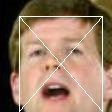

In [9]:
pi = f"{pimg}/"+f"00001.jpg"
op = f"{proj}/Data/Z1.jpg"
img = cv.imread(pi)

min_y, max_y, min_x, max_x = f_xy(img)
print((max_y-min_y)*(max_x-min_x))

cv.line(img, (min_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (min_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (max_x, min_y), (255, 255, 255))

cv.imwrite(op, img)
Image(filename=op, width=300, height=300)

8075


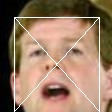

In [10]:
pi = f"{pimg}/"+f"00001.jpg"
op = f"{proj}/Data/Z1.jpg"
img = cv.imread(pi)

min_y, max_y, min_x, max_x = f_xy_mtcnn(img)
print((max_y-min_y)*(max_x-min_x))

cv.line(img, (min_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (min_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (max_x, min_y), (255, 255, 255))

cv.imwrite(op, img)
Image(filename=op, width=300, height=300)

6308


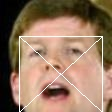

In [11]:
pi = f"{pimg}/"+f"00001.jpg"
op = f"{proj}/Data/Z1.jpg"
img = cv.imread(pi)

min_y, max_y, min_x, max_x = f_xy_facer(img)
print((max_y-min_y)*(max_x-min_x))

cv.line(img, (min_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (min_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (max_x, min_y), (255, 255, 255))

cv.imwrite(op, img)
Image(filename=op, width=300, height=300)

7254


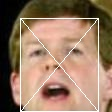

In [12]:
pi = f"{pimg}/"+f"00001.jpg"
op = f"{proj}/Data/Z1.jpg"
img = cv.imread(pi)

min_y1, max_y1, min_x1, max_x1 = f_xy(img)
min_y2, max_y2, min_x2, max_x2 = f_xy_mtcnn(img)
min_y3, max_y3, min_x3, max_x3 = f_xy_facer(img)

min_yl, max_yl = fx1(min_y1,min_y2,min_y3), fx2(max_y1,max_y2,max_y3)
min_xl, max_xl = fx1(min_x1,min_x2,min_x3), fx2(max_x1,max_x2,max_x3)

min_y, max_y, min_x, max_x = min_yl, max_yl, min_xl, max_xl
print((max_y-min_y)*(max_x-min_x))

cv.line(img, (min_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (min_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (max_x, min_y), (255, 255, 255))

cv.imwrite(op, img)
Image(filename=op, width=300, height=300)

In [13]:


def min_max_x_y(images):
    min_y1, max_y1, min_x1, max_x1 = f_xy(images)
    min_y2, max_y2, min_x2, max_x2 = f_xy_mtcnn(images)
    min_y3, max_y3, min_x3, max_x3 = f_xy_facer(images)
    
    min_y, max_y = fx1(min_y1,min_y2,min_y3), fx2(max_y1,max_y2,max_y3)
    min_x, max_x = fx1(min_x1,min_x2,min_x3), fx2(max_x1,max_x2,max_x3)
    return min_y, max_y, min_x, max_x


def frun(tpath, time):
    d = 25.5
    
    for i in tnrange(st, ed+1, desc=f"S{time+1}"):
        pi = f"{pimg}/"+f"00000{i}"[-5:]+".jpg"
        op = f"{pout}/images/"+f"00000{i}"[-5:]+".jpg"

        img = cv.imread(pi)
        imgj, min_p012 = 1, 99999.0
                
        min_yl, max_yl, min_xl, max_xl = min_max_x_y(img)
        
        for imgi in range(st, ed+1, 1):
            imgx = cv.imread(tpath+f"00000{imgi}"[-5:]+".jpg")
            
            if not isinstance(imgx, type(None)):
                p012 = f_lf1(
                    img[min_yl:max_yl, min_xl:max_xl],
                    np.clip(
                        imgx[min_yl:max_yl, min_xl:max_xl], 
                        img[min_yl:max_yl, min_xl:max_xl]-d, 
                        img[min_yl:max_yl, min_xl:max_xl]+d
                    )
                )
                
                if p012 < min_p012 and imgi != i:
                    imgj, min_p012 = imgi, p012

        print(f"{i},{imgj}, Avg:{min_p012:.{6}}", min_yl, max_yl, min_yl, max_yl)
        
        img_o = img.copy()
        img_g = cv.imread(tpath+f"00000{imgj}"[-5:]+".jpg")
    
        img_o[min_yl:max_yl, min_xl:max_xl] = img_g[min_yl:max_yl, min_xl:max_xl]
        img_o = np.clip(img_o, img-d, img+d)        
        cv.imwrite(op, img_o)
        
        for _ in range(5000):
            img_o = img.copy()
            img_g = cv.imread(op)
            rxy = min_max_x_y(img_g)
            
            if (min_yl, max_yl, min_xl, max_xl) == rxy:
                break

            min_yl, max_yl, min_xl, max_xl = rxy
            img_o[min_yl:max_yl, min_xl:max_xl] = img_g[min_yl:max_yl, min_xl:max_xl]     
            cv.imwrite(op, img_o)

frun(tpath=f"{pimg}/", time=0)



1,401, Avg:2802.81 18 111 18 111
2,233, Avg:2918.1 21 111 21 111
3,116, Avg:3087.9 15 110 15 110
4,368, Avg:2926.57 12 111 12 111
5,111, Avg:2712.2 18 108 18 108
6,109, Avg:2672.64 14 111 14 111
7,655, Avg:3208.27 12 110 12 110
8,123, Avg:2631.79 14 108 14 108
9,704, Avg:2612.46 18 111 18 111
10,596, Avg:2285.44 30 108 30 108
11,161, Avg:2689.85 16 110 16 110
12,224, Avg:3135.39 22 111 22 111
13,112, Avg:2603.2 21 111 21 111
14,523, Avg:2601.03 16 111 16 111
15,449, Avg:2710.68 14 111 14 111
16,196, Avg:2609.78 15 111 15 111
17,86, Avg:2589.89 18 111 18 111
18,229, Avg:2720.51 11 110 11 110
19,515, Avg:2960.02 15 111 15 111
20,155, Avg:2755.72 17 111 17 111
21,149, Avg:2586.73 21 111 21 111
22,65, Avg:2934.14 17 108 17 108
23,386, Avg:2552.91 23 110 23 110
24,155, Avg:2624.05 20 111 20 111
25,645, Avg:2652.41 18 109 18 109
26,328, Avg:2785.22 17 108 17 108
27,608, Avg:2584.03 19 111 19 111
28,453, Avg:2875.49 18 111 18 111
29,318, Avg:2879.73 16 111 16 111
30,572, Avg:2706.14 15 111 15

240,112, Avg:2798.14 19 111 19 111
241,104, Avg:2437.43 16 111 16 111
242,182, Avg:2627.72 18 111 18 111
243,138, Avg:2667.38 17 107 17 107
244,278, Avg:2517.37 17 111 17 111
245,6, Avg:2541.73 15 111 15 111
246,632, Avg:3027.02 19 111 19 111
247,280, Avg:3052.67 11 111 11 111
248,222, Avg:2672.9 18 108 18 108
249,571, Avg:2555.27 13 111 13 111
250,712, Avg:2784.92 12 111 12 111
251,39, Avg:2626.71 18 111 18 111
252,289, Avg:2628.49 20 111 20 111
253,332, Avg:2398.52 18 110 18 110
254,148, Avg:2625.97 17 109 17 109
255,93, Avg:2509.79 18 111 18 111
256,237, Avg:2864.37 17 111 17 111
257,155, Avg:2927.15 25 111 25 111
258,613, Avg:2749.1 18 102 18 102
259,625, Avg:2783.6 20 111 20 111
260,93, Avg:2607.03 15 111 15 111
261,72, Avg:2588.34 11 108 11 108
262,21, Avg:2647.35 17 111 17 111
263,278, Avg:2765.37 16 110 16 110
264,704, Avg:2440.27 17 110 17 110
265,624, Avg:2772.39 22 111 22 111
266,685, Avg:2841.61 18 110 18 110
267,25, Avg:2914.06 18 111 18 111
268,613, Avg:2765.9 18 109 18 1

476,164, Avg:2860.19 19 111 19 111
477,229, Avg:2559.83 19 111 19 111
478,168, Avg:2463.47 16 111 16 111
479,608, Avg:2865.19 13 110 13 110
480,613, Avg:2667.44 15 111 15 111
481,222, Avg:2439.26 12 109 12 109
482,149, Avg:2318.75 21 107 21 107
483,282, Avg:2569.58 14 111 14 111
484,429, Avg:2476.01 15 111 15 111
485,518, Avg:2897.87 20 111 20 111
486,443, Avg:2545.64 17 111 17 111
487,167, Avg:2574.94 17 111 17 111
488,358, Avg:2571.38 17 111 17 111
489,244, Avg:4070.02 1 111 1 111
490,307, Avg:2518.8 16 110 16 110
491,116, Avg:2904.23 16 111 16 111
492,647, Avg:2740.85 22 111 22 111
493,43, Avg:2957.09 15 111 15 111
494,229, Avg:2410.04 18 111 18 111
495,305, Avg:2547.96 19 111 19 111
496,109, Avg:2498.42 18 111 18 111
497,109, Avg:2370.84 18 111 18 111
498,331, Avg:3045.76 21 111 21 111
499,521, Avg:2944.02 14 111 14 111
500,434, Avg:2759.51 16 111 16 111
501,512, Avg:2646.7 21 111 21 111
502,596, Avg:2720.49 15 109 15 109
503,74, Avg:2892.81 14 111 14 111
504,301, Avg:2524.69 17 10

712,141, Avg:2534.74 17 110 17 110



In [14]:
! sh run.sh

.....
  adding: images/ (stored 0%)
  adding: images/00132.jpg (deflated 4%)
  adding: images/00654.jpg (deflated 4%)
  adding: images/00640.jpg (deflated 4%)
  adding: images/00126.jpg (deflated 4%)
  adding: images/00668.jpg (deflated 4%)
  adding: images/00697.jpg (deflated 4%)
  adding: images/00683.jpg (deflated 3%)
  adding: images/00456.jpg (deflated 4%)
  adding: images/00330.jpg (deflated 4%)
  adding: images/00324.jpg (deflated 4%)
  adding: images/00442.jpg (deflated 4%)
  adding: images/00318.jpg (deflated 4%)
  adding: images/00495.jpg (deflated 4%)
  adding: images/00481.jpg (deflated 4%)
  adding: images/00522.jpg (deflated 4%)
  adding: images/00244.jpg (deflated 4%)
  adding: images/00250.jpg (deflated 4%)
  adding: images/00536.jpg (deflated 4%)
  adding: images/00278.jpg (deflated 4%)
  adding: images/00287.jpg (deflated 4%)
  adding: images/00293.jpg (deflated 4%)
  adding: images/00046.jpg (deflated 4%)
  adding: images/00052.jpg (deflated 4%)
  adding: images/0070

  adding: images/00191.jpg (deflated 4%)
  adding: images/00344.jpg (deflated 4%)
  adding: images/00422.jpg (deflated 4%)
  adding: images/00436.jpg (deflated 4%)
  adding: images/00350.jpg (deflated 4%)
  adding: images/00378.jpg (deflated 4%)
  adding: images/00387.jpg (deflated 4%)
  adding: images/00393.jpg (deflated 4%)
  adding: images/00230.jpg (deflated 3%)
  adding: images/00556.jpg (deflated 4%)
  adding: images/00542.jpg (deflated 4%)
  adding: images/00224.jpg (deflated 4%)
  adding: images/00218.jpg (deflated 4%)
  adding: images/00595.jpg (deflated 4%)
  adding: images/00581.jpg (deflated 4%)
  adding: images/00032.jpg (deflated 4%)
  adding: images/00026.jpg (deflated 4%)
  adding: images/00027.jpg (deflated 4%)
  adding: images/00033.jpg (deflated 4%)
  adding: images/00580.jpg (deflated 4%)
  adding: images/00594.jpg (deflated 4%)
  adding: images/00219.jpg (deflated 4%)
  adding: images/00543.jpg (deflated 4%)
  adding: images/00225.jpg (deflated 4%)
  adding: images

  adding: images/00177.jpg (deflated 4%)
  adding: images/00163.jpg (deflated 4%)
  adding: images/00605.jpg (deflated 4%)
  adding: images/00639.jpg (deflated 4%)
  adding: images/00149.jpg (deflated 4%)
  adding: images/00175.jpg (deflated 4%)
  adding: images/00613.jpg (deflated 4%)
  adding: images/00607.jpg (deflated 4%)
  adding: images/00161.jpg (deflated 4%)
  adding: images/00439.jpg (deflated 4%)
  adding: images/00411.jpg (deflated 4%)
  adding: images/00377.jpg (deflated 4%)
  adding: images/00363.jpg (deflated 4%)
  adding: images/00405.jpg (deflated 4%)
  adding: images/00388.jpg (deflated 4%)
  adding: images/00559.jpg (deflated 4%)
  adding: images/00565.jpg (deflated 4%)
  adding: images/00203.jpg (deflated 4%)
  adding: images/00217.jpg (deflated 4%)
  adding: images/00571.jpg (deflated 4%)
  adding: images/00029.jpg (deflated 4%)
  adding: images/00001.jpg (deflated 4%)
  adding: images/00015.jpg (deflated 4%)
  adding: images/00014.jpg (deflated 4%)
  adding: images